In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('datasets_439329_834256_car data.csv')

In [3]:
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 10)

In [5]:
print('Seller_Type',df['Seller_Type'].unique())
print('Transmission',df['Transmission'].unique())
print('Owners : ',df['Owner'].unique())
print(df['Fuel_Type'].unique())



Seller_Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owners :  [0 1 3]
['Petrol' 'Diesel' 'CNG']


In [6]:
# check missin gvalues
df.isna().sum()
#df.isnull().sum()

Car_Name         0
company          0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe(include='all')

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,9,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,honda,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,70,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [8]:
df.columns

Index(['Car_Name', 'company', 'Year', 'Selling_Price', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
final_data=df[['Year', 'Selling_Price', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
       ]]

In [10]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
final_data['Current_year']=2020

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
final_data['no_year']=final_data['Current_year']-final_data['Year']

In [13]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [14]:
final_data.drop(['Year'],axis=1, inplace=True)

In [15]:
final_data.drop(['Current_year'], axis=1, inplace=True)

In [16]:
# now convet data into dummies 
final_data=pd.get_dummies(final_data, drop_first=True)

In [17]:
final_data

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

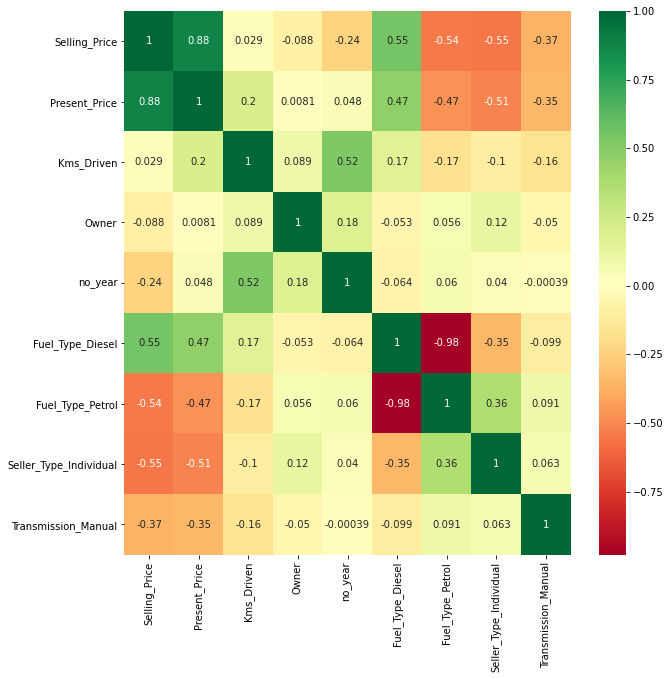

In [19]:
cor=final_data.corr()
top_corr_features=cor.index
plt.figure(figsize=(10,10))
sns.heatmap(final_data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [20]:
x=final_data.iloc[:,1:]
y=final_data.iloc[:,0]

In [21]:
x.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [22]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

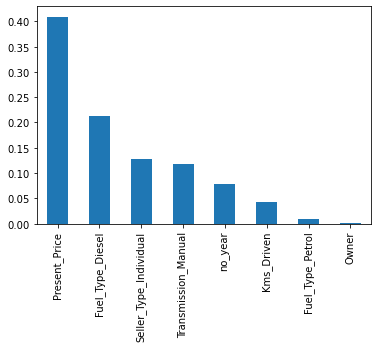

In [23]:
#plot graph of feature importance for better visulisatuon
fect_imp=pd.Series(model.feature_importances_, index=x.columns)
fect_imp.nlargest(9).plot(kind='bar')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.2)

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [26]:
### Hyperpearameter
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200, num=12)]
### no of features to consider at every split
max_feature=['auto','sqrt']
#### maximum number of level in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
# minimum no of samples requied to split a  node
min_samples_split=[2,5,10,15,100]
# minimum number ofsamoles required at each lead noad
min_samples_leaf=[1,2,5,10]

In [27]:
# randomize search cv helps us to search best hyper perameters
from sklearn.model_selection import RandomizedSearchCV

In [28]:
random_grid= {'n_estimatores':n_estimators,'max_feature':max_feature,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [29]:
print(random_grid)

{'n_estimatores': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_feature': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [30]:
rf=RandomForestRegressor()

In [45]:
nrf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='reg_mean_squared_error',n_iter=10,cv=5,verbose=2, random_state=42, n_jobs=1)

In [46]:
rf_random.fit(x_train,y_train)

RandomForestRegressor()

In [49]:
rf_random.score(x_train,y_train)

0.989156021893988

In [33]:
predictionprd=rf_random.predict(x_test)

In [34]:
predictionprd

array([ 4.6015,  8.677 , 22.521 , 20.5409,  6.8255,  4.8282, 10.6365,
        0.5568,  0.1865, 16.4988,  7.125 ,  0.4622,  5.855 ,  7.7751,
        7.1899,  0.8912,  7.229 ,  4.6995,  4.788 ,  0.4013,  5.7945,
        5.3225,  0.4806,  4.2455,  4.223 ,  4.1165,  0.4363,  2.6425,
       10.5663,  6.6528,  3.003 ,  3.4695,  0.2352,  8.4035,  6.663 ,
        8.7134,  6.907 ,  4.419 ,  0.4291,  0.398 ,  0.5916,  0.7131,
        5.3465,  5.7215,  5.1525,  4.413 ,  1.188 ,  3.0205,  1.0425,
        0.4618,  5.698 ,  3.737 ,  4.3945,  0.4504,  5.7414,  1.4825,
        6.0337,  3.1003,  2.4032,  9.7642,  2.9025])

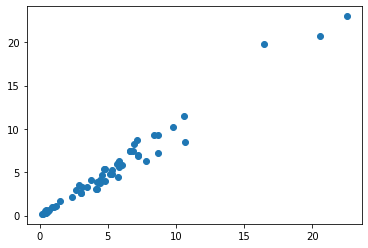

In [35]:
plt.scatter(predictionprd,y_test)

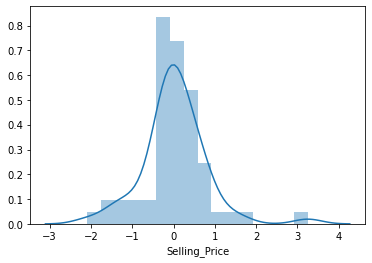

In [36]:
sns.distplot(y_test-predictionprd)

import pickle
#open a file, where you want to store the data
file= open('random_forest_regression_model.pkl','wb')

# dump information to that file
pickle.dump(rf_random,file)